In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wafermap

In [47]:
wafer_radius=150
edge_exclusion = 3

In [48]:
def create_wafermap(wafer_radius,edge_exclusion,export=False):
    """
    Function to create a wafermap for a given radius, and edge exclusion
    Returns: dataframe with X and Y co ordinate values as two columns
    """

    data = []
    X=[]
    Y=[]
    index=[]
    count=0

    for i in range(-1 *wafer_radius,wafer_radius,15):
        for j in range(-1 *wafer_radius,wafer_radius,15):
            X.append(i)
            Y.append(j)
            data.append([i,j])
            count = count + 1
            index.append(count)

    #measurements = np.round(np.random.randn(len(data))*10,2)

    #Remove points outside the circle
    df = pd.DataFrame(index=index,columns=['X','Y'], data=data)

    df['radial_distance'] = np.round(np.sqrt(df['X']**2 + df['Y']**2),2)

    #Remove points within the edge exclusion zone
    df = df[df['radial_distance'] <= (150 - edge_exclusion)]
    df = df.reset_index().drop(axis=1,columns=['index','radial_distance'])

    if export:
        #Export wafer map to csv
        df.to_csv('Wafermap2.csv',index=False,encoding='UTF-8')

    print(df.head())
    return df

def generate_measurements(data,meas_ratio=0.5):
    num_meas_points = meas_ratio * len(data)
    measurements = np.round(np.random.randn(len(data))*10,2)
    data['Value'] = measurements

    return data
    


def plot_wafermap(df, value_column=None, quadrant_lines=False,show_coordinates=None):

    fig = plt.figure(figsize=(12,10),dpi=200)
    ax = fig.add_subplot(1, 1, 1)

    circ = plt.Circle((0, 0), radius=150,fill=None)
    ax.add_patch(circ)

    #plt.legend()
    if value_column:
        print('Here')
        plt.scatter(x=df['X'],y=df['Y'],c=df[value_column])

    else:
        plt.scatter(x=df['X'],y=df['Y'])
    
    if quadrant_lines:
        ax.hlines(y=0,xmin=-150,xmax=150)
        ax.vlines(x=0,ymin=-150,ymax=150)

    if show_coordinates == 'All':
        for (xi, yi) in zip(df['X'].values,df['Y'].values):
            plt.text(xi, yi, (xi,yi), va='top', ha='center')
    if show_coordinates == 'Meas_only':
        
        for (xi, yi) in zip(df[df[value_column].notnull()]['X'].values, 
                        df[df[value_column].notnull()]['Y'].values):
            plt.text(xi, yi, (xi,yi), va='top', ha='center',size=6)
    else:
        pass

    plt.colorbar()
    plt.show()

In [49]:
df = create_wafermap(wafer_radius,edge_exclusion)
df = generate_measurements(df)
df

     X   Y
0 -135 -45
1 -135 -30
2 -135 -15
3 -135   0
4 -135  15


,X,Y,Value
0,-135,-45,0.60
1,-135,-30,-6.63
2,-135,-15,3.75
3,-135,0,-8.71
4,-135,15,-1.74
...,...,...,...
288,135,-15,-7.19
289,135,0,1.02
290,135,15,-2.53
291,135,30,-3.18


Here


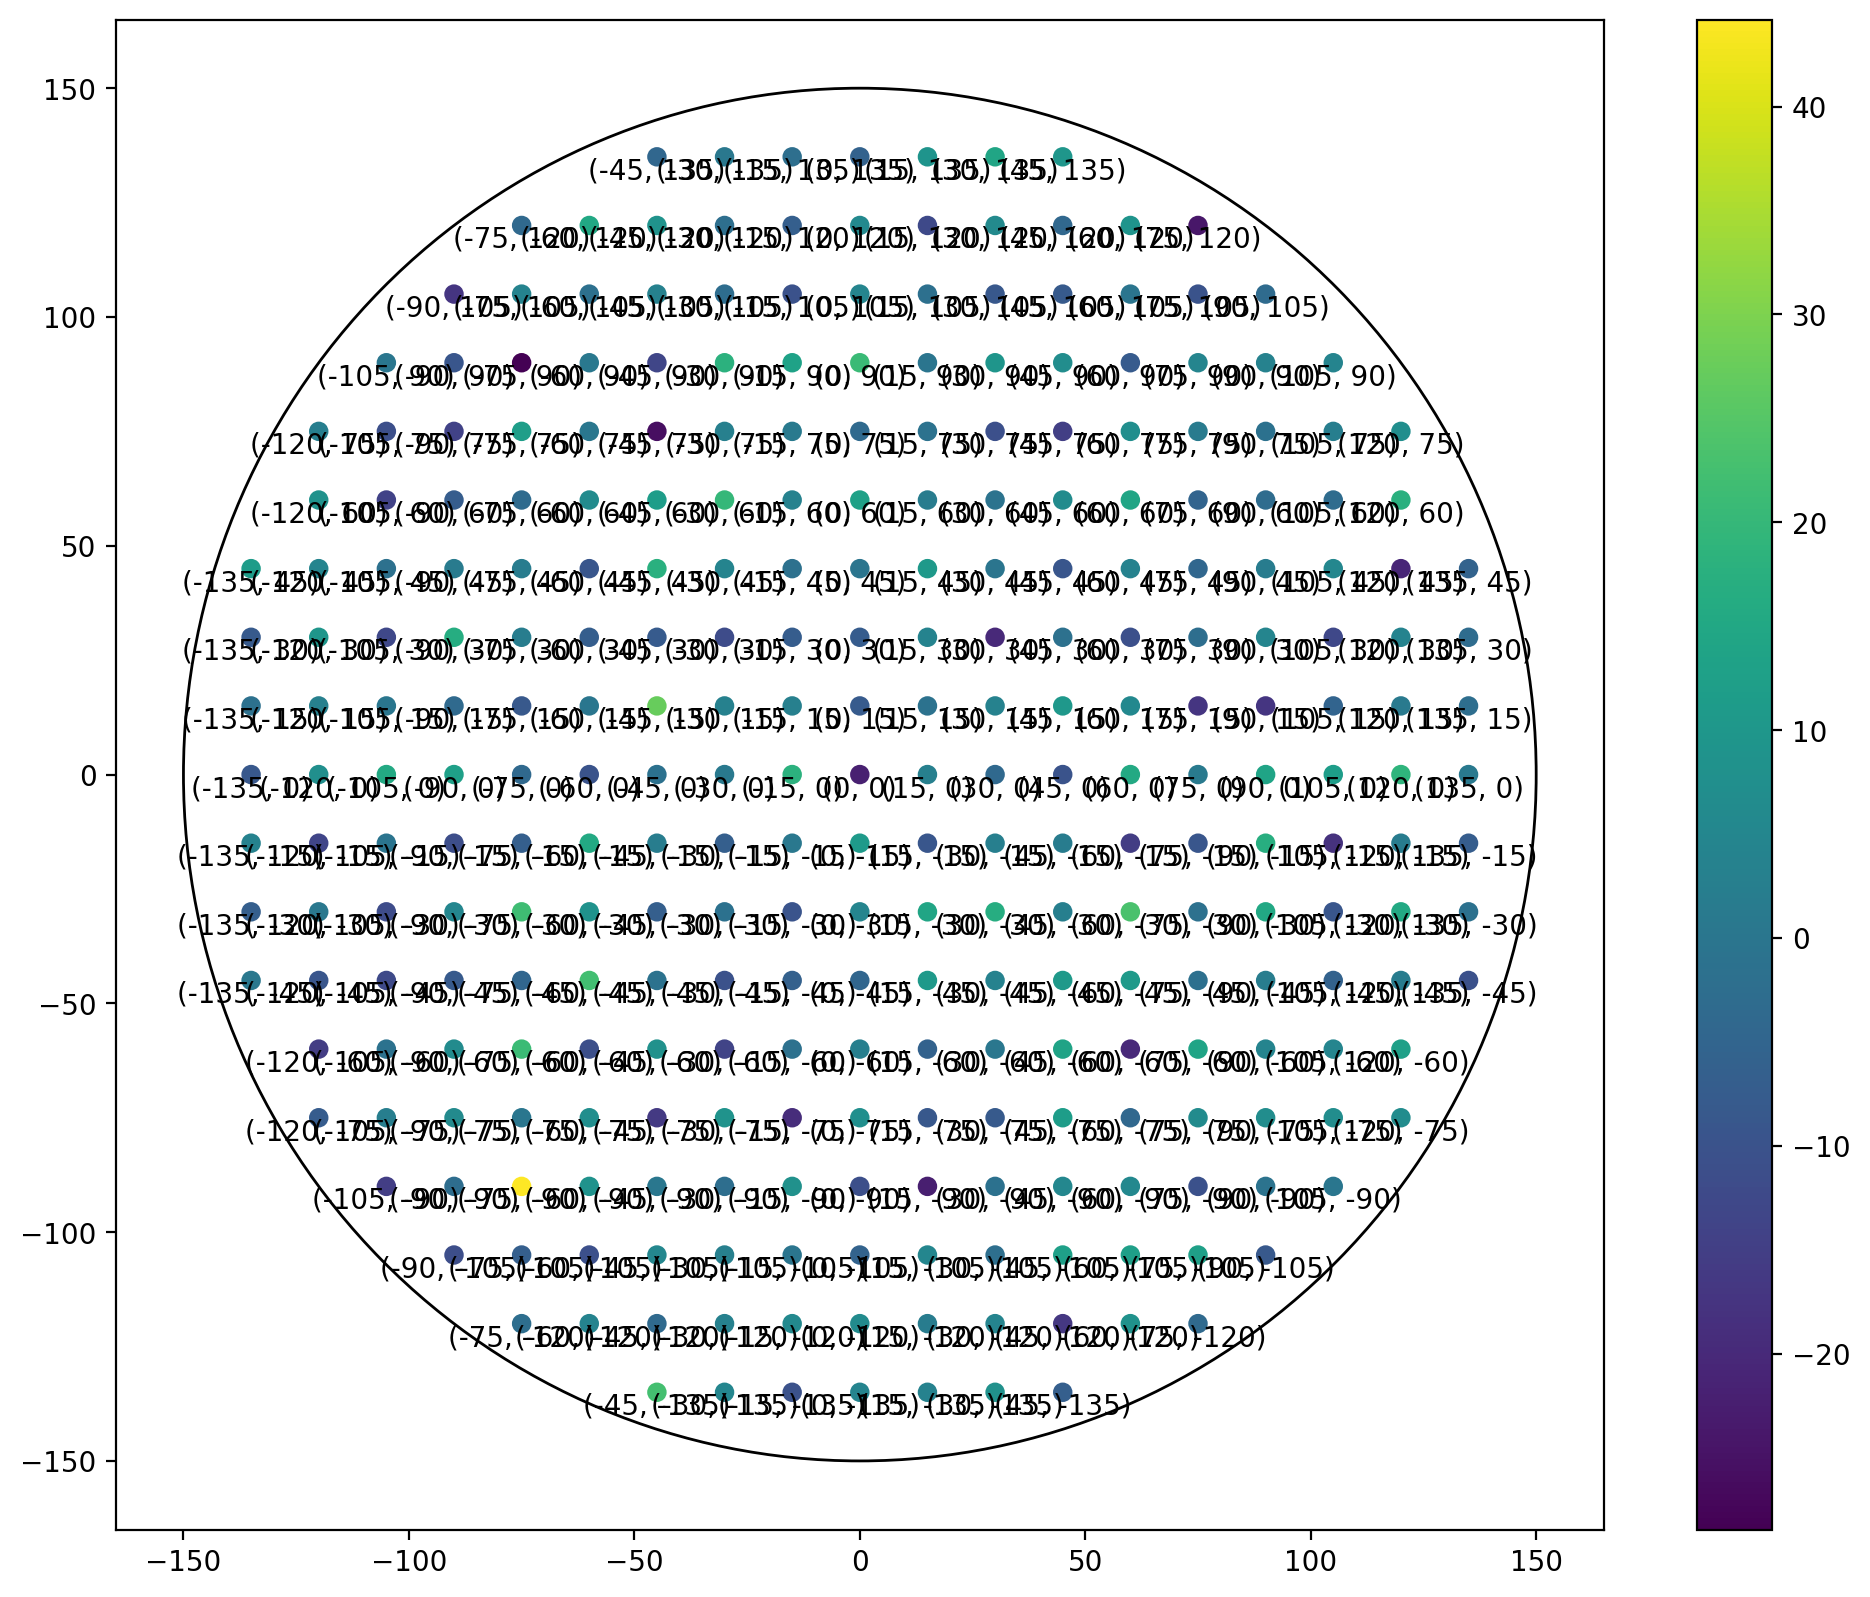

In [51]:
plot_wafermap(df,value_column='Value',show_coordinates='All')